# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%matplotlib widget

In [2]:
pr = pd.read_csv('previsao_de_renda.csv')
pr.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [3]:
prq = pr[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']]
prq.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37


In [4]:
prq.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


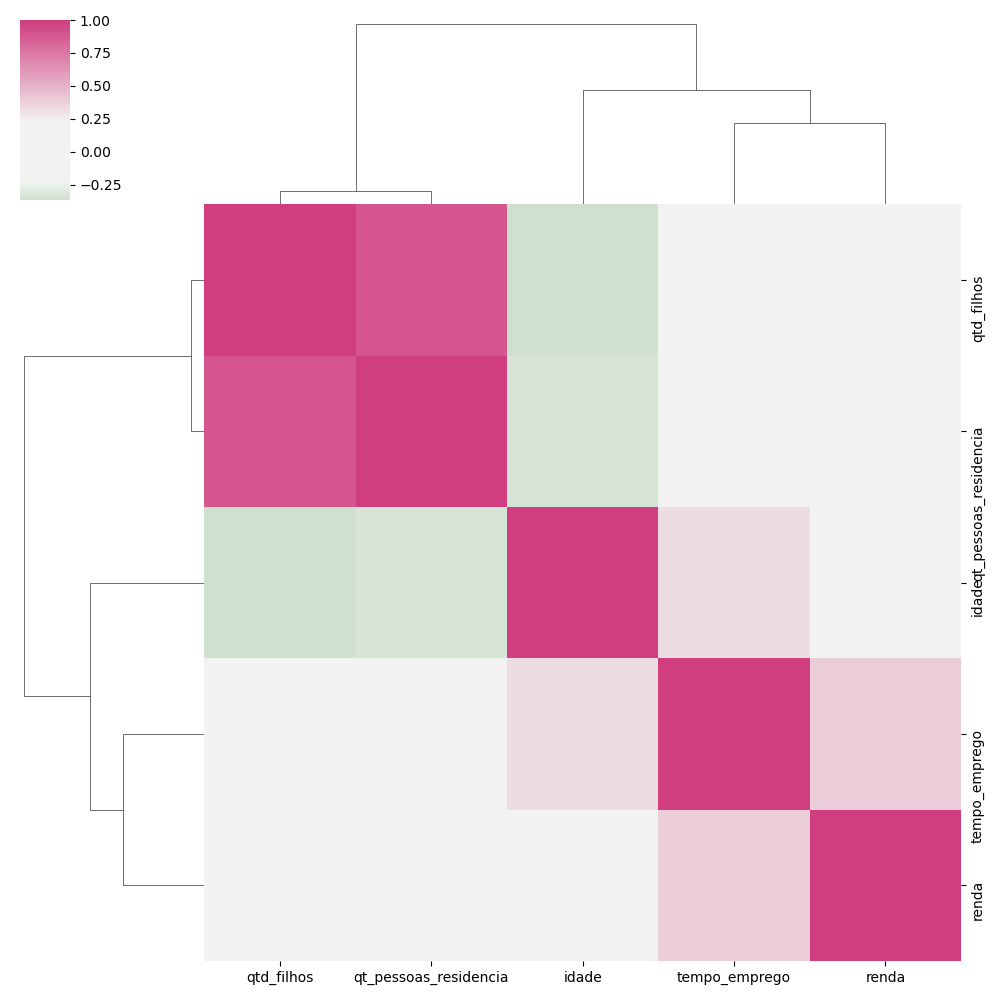

In [5]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light') #copiado do notebook de exemplos
cl = sns.clustermap(data=prq.corr(), center=0, cmap=cmap)

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

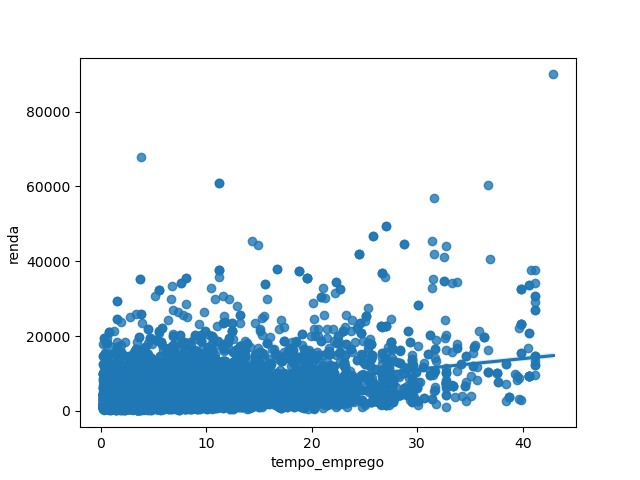

In [6]:
#pelo que mostra a matriz de correlacao a unica variavel que faz sentido analisar seria tempo de emprego.
plt.close()

sns.regplot(data=prq, x='tempo_emprego', y='renda')
plt.show()

3) Na su aopinião, há outliers na variável renda?

<Axes: ylabel='renda'>

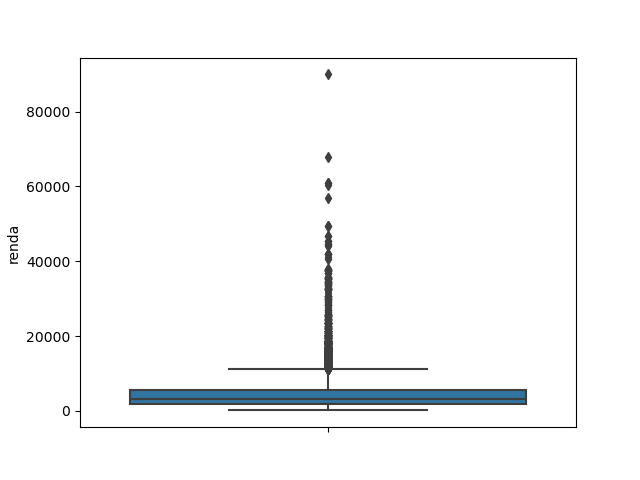

In [7]:
# Sim, principalmente as rendas acima de 20000 estao muito longe dos outros dados
plt.close()

sns.boxplot(data=prq, y='renda')

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [8]:
plt.close()

prq['renda_log'] = np.log(prq['renda'])

prq.corr()

/tmp/ipykernel_15923/1050644721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prq['renda_log'] = np.log(prq['renda'])


,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,renda_log
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
renda_log,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000


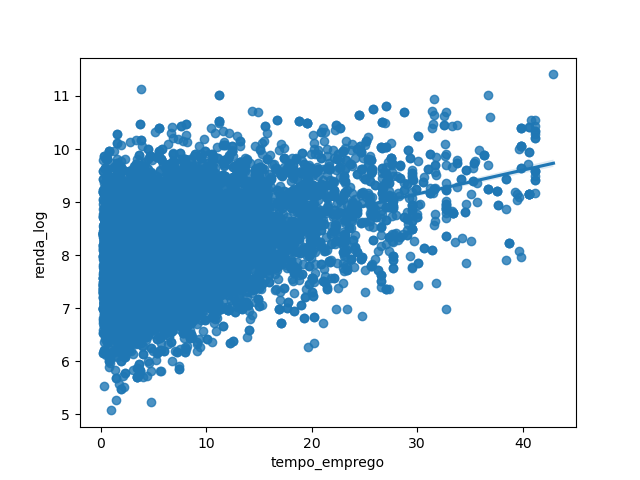

In [9]:
rp = sns.regplot(data=prq, x='tempo_emprego', y='renda_log')
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [10]:
#Melhorou a visualizacao, sendo possivel entender melhor o que esta acontecendo, mas a correlacao permaneceu similar.